<a href="https://colab.research.google.com/github/ProEarth/numerical-analysis/blob/master/Coding_a_Facet_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## get 2010 baseball season data - source: https://www.retrosheet.org/gamelogs/index.html
df2010 = pd.read_csv("https://raw.githubusercontent.com/flyaflya/persuasive/main/baseball10.csv")

## get 2021 baseball season data - source: https://www.retrosheet.org/gamelogs/index.html
df2021 = pd.read_csv("https://raw.githubusercontent.com/flyaflya/persuasive/main/baseball21.csv")

## aggregate data to get average homeruns and runs per
## game by "Home" stadium and by year

avgDF2010 = (df2010
    .assign(totalHR = lambda df: df.visHR + df.homeHR)
    .assign(totalRuns = lambda df: df.homeScore + df.visScore)
    .drop(columns = ['date','visiting'])
    .groupby(['home'], as_index=False)
    .mean()
)
avgDF2021 = (df2021
    .assign(totalHR = lambda df: df.visHR + df.homeHR)
    .assign(totalRuns = lambda df: df.homeScore + df.visScore)
    .drop(columns = ['date','visiting'])
    .groupby(['home'], as_index=False)
    .mean()
)


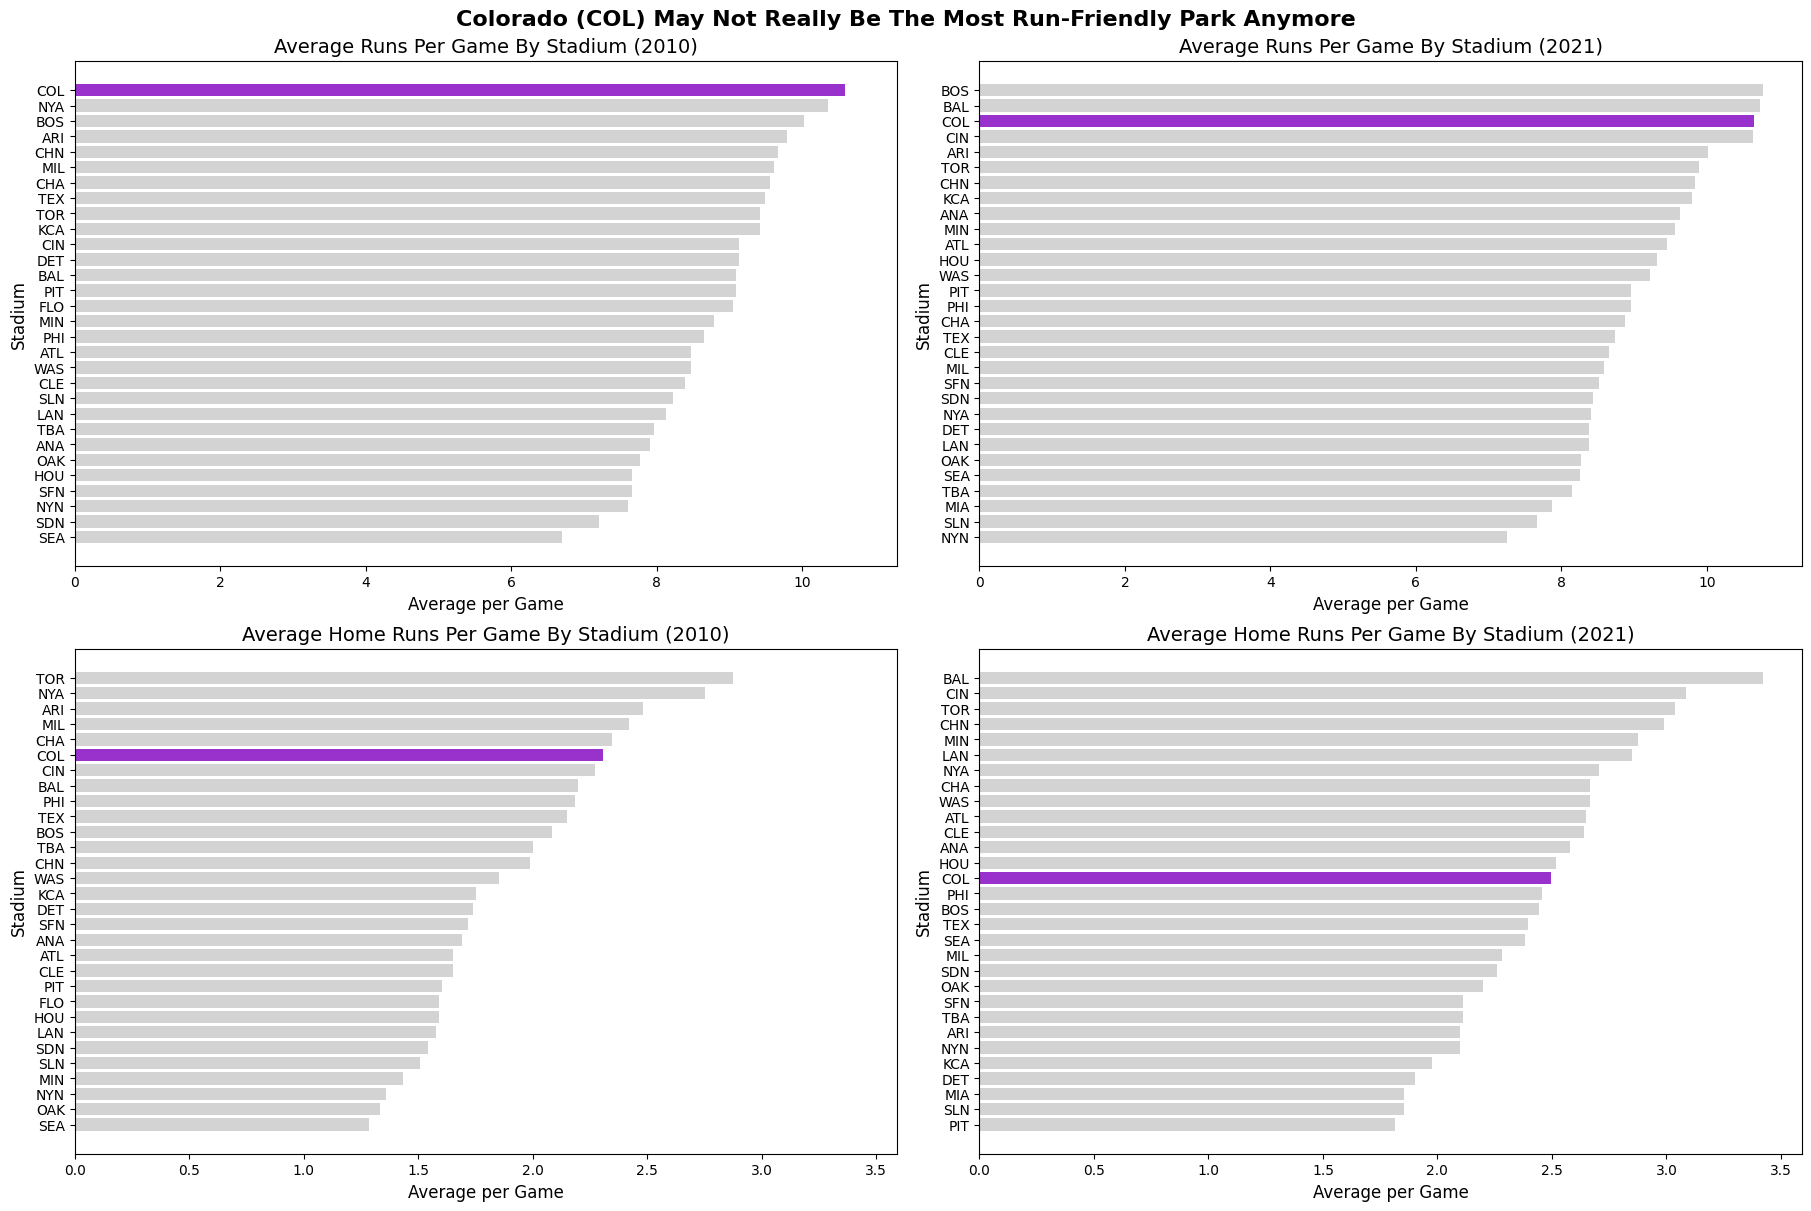

In [3]:
# 确保球场名称一致
avgDF2010['home'] = avgDF2010['home'].str.strip()
avgDF2021['home'] = avgDF2021['home'].str.strip()

# 识别 COL 球场
coors_field = "COL"

# 按得分排序
avgDF2010 = avgDF2010.sort_values(by='totalRuns', ascending=True)
avgDF2021 = avgDF2021.sort_values(by='totalRuns', ascending=True)

# 按全垒打排序
avgDF2010_HR = avgDF2010.sort_values(by='totalHR', ascending=True)
avgDF2021_HR = avgDF2021.sort_values(by='totalHR', ascending=True)

# 设置绘图风格
# plt.style.use("seaborn-whitegrid")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), layout="constrained", sharex="row")

# 画图函数
def plot_bar(ax, data, metric, title):
    colors = ["darkorchid" if home == coors_field else "lightgrey" for home in data["home"]]
    ax.barh(data["home"], data[metric], color=colors)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Average per Game", fontsize=12)
    ax.set_ylabel("Stadium", fontsize=12)

# 绘制图表
plot_bar(axs[0, 0], avgDF2010, "totalRuns", "Average Runs Per Game By Stadium (2010)")
plot_bar(axs[0, 1], avgDF2021, "totalRuns", "Average Runs Per Game By Stadium (2021)")
plot_bar(axs[1, 0], avgDF2010_HR, "totalHR", "Average Home Runs Per Game By Stadium (2010)")
plot_bar(axs[1, 1], avgDF2021_HR, "totalHR", "Average Home Runs Per Game By Stadium (2021)")

# 添加大标题
fig.suptitle("Colorado (COL) May Not Really Be The Most Run-Friendly Park Anymore", fontsize=16, fontweight="bold")

# 保存为 PDF
plt.savefig("coors.pdf")
plt.show()
